<a href="https://colab.research.google.com/github/intrusnak3/desafios-machine-learning/blob/master/prediction_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB





In [0]:
dataset = pd.read_csv('Mission_Prediction_Dataset.csv')

In [363]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
idade           303 non-null int64
sexo            303 non-null int64
dor-peitoral    303 non-null int64
psr             303 non-null int64
col             303 non-null int64
glicose         303 non-null int64
ecg             303 non-null int64
fcmax           303 non-null int64
angex           303 non-null int64
oldpeak         303 non-null float64
inclinacao      303 non-null int64
ca              303 non-null int64
thal            303 non-null int64
alvo            303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [293]:
dataset.shape

(303, 14)

In [294]:
dataset.isnull().values.any()

False

In [0]:
dataset.rename(columns={ dataset.columns[0]: "idade", dataset.columns[1]: "sexo" , dataset.columns[2]: "dor-peitoral", 
                        dataset.columns[3]: "psr", dataset.columns[4]: "col" , dataset.columns[5]: "glicose",
                        dataset.columns[6]: "ecg", dataset.columns[7]: "fcmax" , dataset.columns[8]: "angex",
                        dataset.columns[9]: "oldpeak", dataset.columns[10]: "inclinacao" , dataset.columns[11]: "ca", 
                        dataset.columns[12]: "thal", dataset.columns[13]: "alvo"}, inplace=True)

In [296]:
dataset.alvo.value_counts()

1    165
0    138
Name: alvo, dtype: int64

In [0]:
x = dataset[['idade','sexo','dor-peitoral','psr','col','glicose','ecg','fcmax','angex','oldpeak','inclinacao','ca','thal',]]
y = dataset.alvo

In [298]:
x.head()

,idade,sexo,dor-peitoral,psr,col,glicose,ecg,fcmax,angex,oldpeak,inclinacao,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


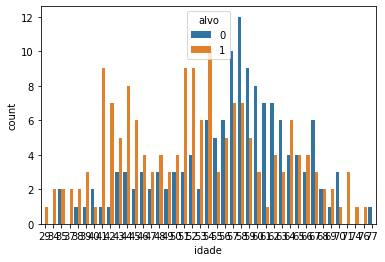

In [362]:
sns.countplot( x="idade", hue='alvo', data=dataset)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(
    x, #Matriz de dados x e y divididos inicialemnte (X é features,Y é target)
    y, 
    test_size=0.3,  #proporção separada para teste (entre 0 e 1). nesse caso, 30% 
    random_state=42,  #Salvando o estado randomico. pode ser qualquer numero(semente do gerador)
    stratify=y) #amostragem stratificada. instrui a manter a mesma proporção de classes no conjunto de train e test(dataset desbalanceado)

In [0]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)

x_test_std = sc.transform(x_test)

In [302]:
print(x_test_std)

[[-0.03412204 -1.48732014  1.02188952 ...  0.92647837 -0.70551548
  -0.56818372]
 [-1.56857985  0.6723502  -0.9386587  ...  0.92647837 -0.70551548
   1.08188407]
 [ 0.51389861  0.6723502  -0.9386587  ... -0.68346765  0.25944763
   1.08188407]
 ...
 [-1.34937159 -1.48732014  1.02188952 ... -0.68346765 -0.70551548
  -0.56818372]
 [-0.47253856  0.6723502  -0.9386587  ... -0.68346765 -0.70551548
   1.08188407]
 [-2.11660049  0.6723502  -0.9386587  ...  0.92647837 -0.70551548
   1.08188407]]


In [303]:
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3,
                              random_state=1)
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [319]:
y_pred = tree.predict(x_test)
accuracy_score(y_test, y_pred)

0.7472527472527473

In [320]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test , 
                            y_pred, 
                            target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.74      0.68      0.71        41
     class 1       0.75      0.80      0.78        50

    accuracy                           0.75        91
   macro avg       0.75      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91



In [329]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_std,y_train)
knn.predict
knn.score(x_test_std,y_test)

0.7912087912087912

In [310]:
clf = LogisticRegression(max_iter=800)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)


0.7472527472527473

In [0]:

rf = RandomForestClassifier()

param_grid = {
    'max_depth': [2],
    'min_samples_leaf': [5],
    'n_estimators': [200],
    'oob_score': [True],
    'random_state': [0],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                      cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(x_train, y_train);

grid_search.best_params_
best_grid = grid_search.best_estimator_
print(best_grid.get_params())

In [368]:
rf = RandomForestClassifier(**best_grid.get_params())
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
rf.score(x_test,y_test)

0.7802197802197802

In [0]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [371]:
xg = xgb.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg.fit(x_train,y_train)

[02:11:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [374]:
preds = xg_reg.predict(x_test)

predictions = [round(value) for value in preds]
accuracy_score(y_test, predictions)
preds

array([0.7328347 , 0.62118345, 0.26303813, 0.6529938 , 0.3326494 ,
       0.29999197, 0.66873634, 0.7687439 , 0.5936495 , 0.5466856 ,
       0.28840148, 0.6263801 , 0.59979546, 0.35948095, 0.73054093,
       0.4607691 , 0.60887206, 0.5888711 , 0.735015  , 0.6063691 ,
       0.58192754, 0.69612837, 0.79242456, 0.8311375 , 0.7006382 ,
       0.7485863 , 0.2872719 , 0.22493461, 0.67348945, 0.22173053,
       0.33514336, 0.60764885, 0.60451823, 0.4387782 , 0.3136282 ,
       0.4199851 , 0.6727743 , 0.27289695, 0.75554717, 0.7037482 ,
       0.7810227 , 0.63101524, 0.22800547, 0.6342063 , 0.36824846,
       0.46311286, 0.54611355, 0.26421344, 0.32249555, 0.4739634 ,
       0.6201323 , 0.3047854 , 0.56686765, 0.6284297 , 0.6436766 ,
       0.69403934, 0.4668269 , 0.70851636, 0.39175254, 0.65602714,
       0.37489069, 0.30548865, 0.7418329 , 0.39215985, 0.46798682,
       0.6199344 , 0.73164177, 0.26133034, 0.48659223, 0.5725915 ,
       0.39938977, 0.5774638 , 0.55891204, 0.5422353 , 0.71041

In [370]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
nb.score(x_test,y_test)


0.7912087912087912